In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree, metrics
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Read in the data
df = pd.read_csv("wine.data", header=None)
# Print the first 5 rows of the data
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [70]:
# Replace dataset column names
df.columns = ['target','alcohol',
                 'malic_acid',
                 'ash',
                 'alcalinity_of_ash',
                 'magnesium',
                 'total_phenols',
                 'flavanoids',
                 'nonflavanoid_phenols',
                 'proanthocyanins',
                 'color_intensity',
                 'hue',
                 'od280/od315_of_diluted_wines',
                 'proline'
                ]
df.head()

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 1.Dataset visualization

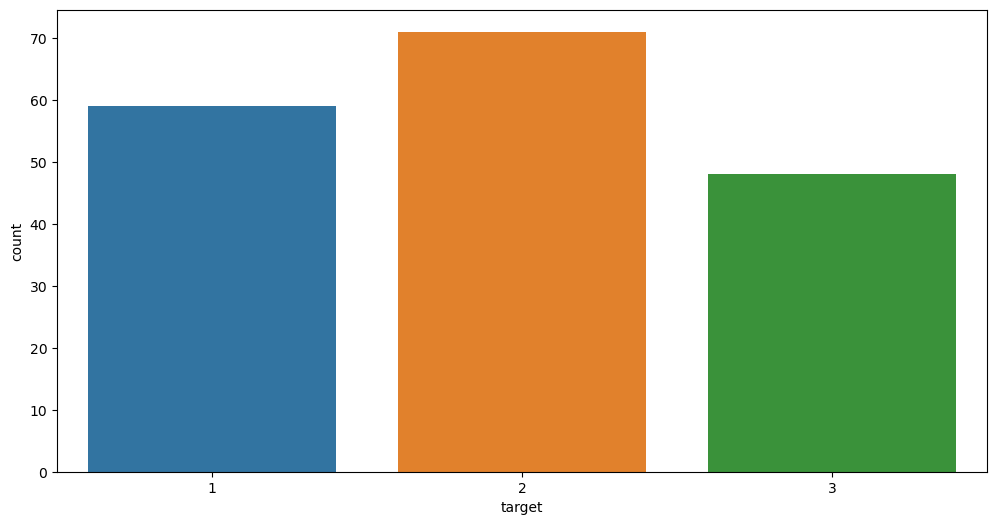

In [71]:
# Displays the distribution of categories in the dataset
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="target")
plt.show()

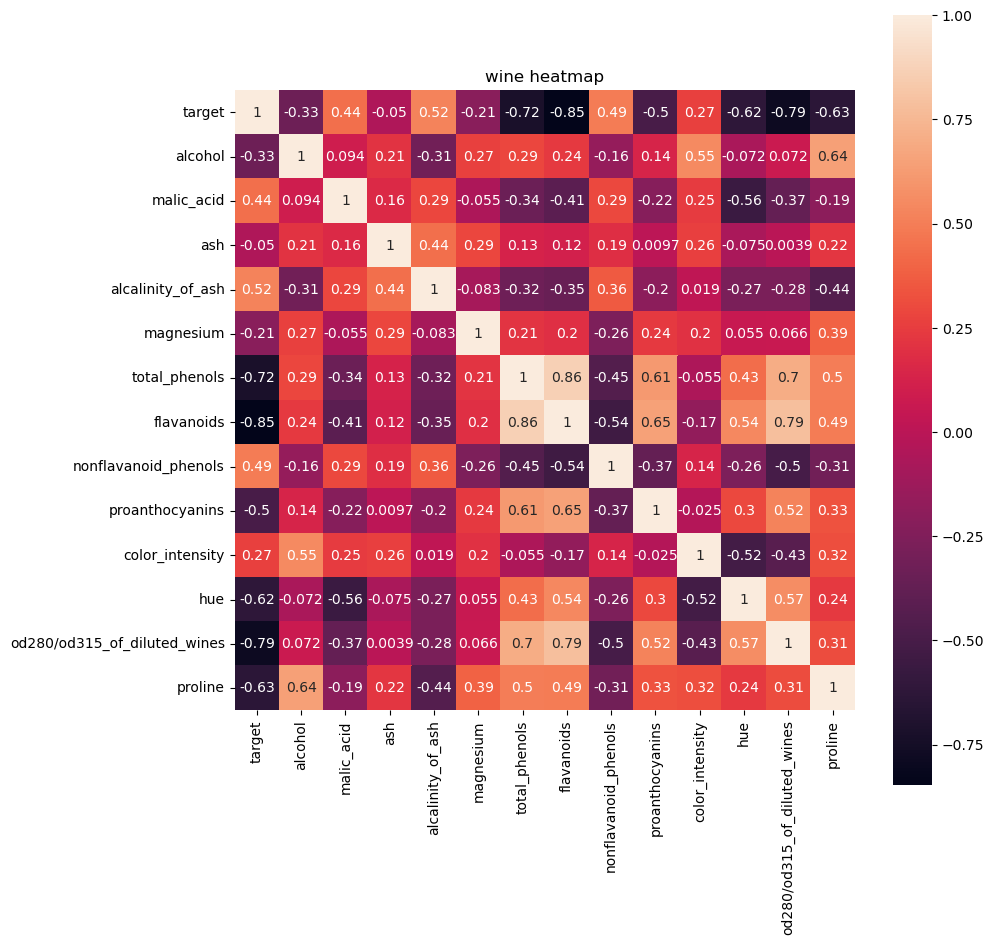

In [93]:
def plot_heatmap(X, title):
    corr = X.corr()
    fig, ax = plt.subplots(figsize=(10,10))  
    sns.heatmap(corr, annot=True, square=True ,ax=ax)
    plt.yticks(rotation=360)
    plt.title(title)
    plt.show()
# Display the correlation between dataset elements
plot_heatmap(df, 'wine heatmap')


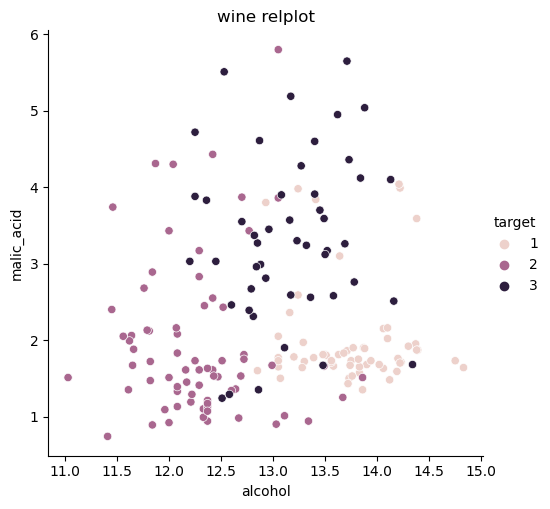

In [73]:
# Displays the distribution of different clusters in the dataset.
def plot_relplot(data,title,x='mean',y='var',hue='hue'):
    sns.relplot(x=x, y=y, hue=hue, data=data)
    plt.title(title)
    plt.show()
plot_relplot(df, 'wine relplot',x='alcohol', y='malic_acid', hue='target',)

# 2.Dataset preprocess

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# print("The number of duplicates is:{}",df.duplicated())# Check for duplicates
# print(df.isnull().sum())   # Check for missing values.
df.dropna()  # Remove missing values
df['target'] = labelencoder.fit_transform(df['target'])

# Divide the data set, and divide the data set into test sets, accounting for 20%;
y = df['target'].values
X = df.drop('target', axis=1).values
from sklearn.datasets import load_wine

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)



# 3.Naive Bayes  Predict

In [21]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.prior_probs = None
        self.mean = None
        self.variance = None
    
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        self.prior_probs = {}
        self.mean = {}
        self.variance = {}
        
        # Calculate the prior probabilities of each class
        for c in self.classes:
            self.prior_probs[c] = len(y_train[y_train==c]) / len(y_train)
        
        # Calculate the mean and variance of each feature for each class
        for c in self.classes:
            X_c = X_train[y_train==c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.variance[c] = np.var(X_c, axis=0)
    
    def predict(self, X_test):
        y_pred = []
        
        for x in X_test:
            posteriors = {}
            
            # Calculate the posterior probability of each class
            for c in self.classes:
                prior = np.log(self.prior_probs[c])
                likelihood = np.sum(np.log(self.gaussian_pdf(x, self.mean[c], self.variance[c])))
                posterior = prior + likelihood
                posteriors[c] = posterior
            
            # Choose the class with highest posterior probability as the prediction
            y_pred.append(max(posteriors, key=posteriors.get))
        
        return y_pred
    
    def gaussian_pdf(self, x, mean, variance):
        pdf = 1 / np.sqrt(2 * np.pi * variance) * np.exp(-0.5 * np.square(x - mean) / variance)

        return pdf


In [80]:
model = GaussianNaiveBayes() # Create a model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  # Model predict
print("Naive Bayes model accuracy:", accuracy_score(y_test, y_pred))

Naive Bayes model accuracy: 1.0


# 4 Decision Tree  Predict

In [77]:
import numpy as np

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        
    def fit(self, X_train, y_train):
        self.tree = self.build_tree(X_train, y_train, depth=0)
        
    def predict(self, X_test):
        y_pred = []
        
        for x in X_test:
            node = self.tree
            
            # Traverse the tree until we reach a leaf node
            while node.get('is_leaf', False) == False:
                if x[node['feature']] <= node['threshold']:
                    node = node['left']
                else:
                    node = node['right']
            
            # Use the majority class of the leaf node as the prediction
            y_pred.append(node['class'])
        
        return y_pred
    
    def build_tree(self, X, y, depth):
        # Check if we've reached the maximum depth or if all examples belong to the same class
        if self.max_depth is not None and depth >= self.max_depth or len(np.unique(y)) == 1:
            return {'is_leaf': True, 'class': np.bincount(y).argmax()}
        
        # Find the best feature and threshold to split the data
        best_feature, best_threshold = self.find_best_split(X, y)
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold
        
        # Recursively build the left and right subtrees
        left = self.build_tree(X[left_indices], y[left_indices], depth+1)
        right = self.build_tree(X[right_indices], y[right_indices], depth+1)
        
        return {'is_leaf': False, 'feature': best_feature, 'threshold': best_threshold, 'left': left, 'right': right}
    
    def find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_impurity = float('inf')
        
        for feature in range(X.shape[1]):
            for threshold in np.unique(X[:, feature]):
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold
                
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                
                left_labels = y[left_indices]
                right_labels = y[right_indices]
                
                impurity = self.gini_impurity(left_labels) * len(left_labels) + self.gini_impurity(right_labels) * len(right_labels)
                
                if impurity < best_impurity:
                    best_feature = feature
                    best_threshold = threshold
                    best_impurity = impurity
        
        return best_feature, best_threshold
    
    def gini_impurity(self, y):
        p = np.bincount(y) / len(y)
        impurity = 1 - np.sum(np.square(p))
        return impurity


In [78]:
model = DecisionTreeClassifier() # Create a model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  # Model predict
print(" Decision Tree model accuracy:", accuracy_score(y_test, y_pred))

model accuracy: 0.8333333333333334


# 5. Model comparison

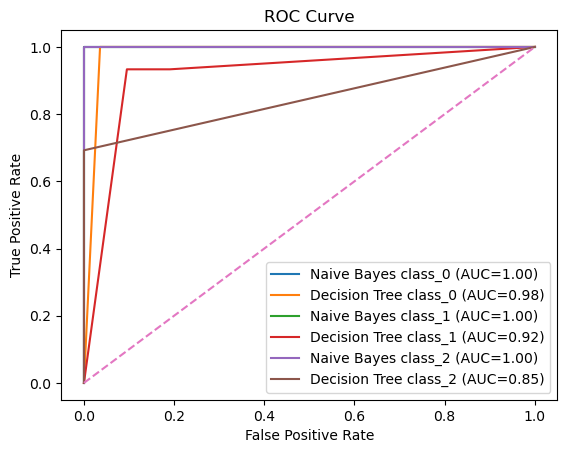

<function print>

In [92]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt



# Train and test the Naive Bayes model
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict_proba(x_test)

# Train and test the Decision Tree Classifier model
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict_proba(x_test)

# Compute the ROC curves and AUC scores for each class
fpr_nb = dict()
tpr_nb = dict()
auc_nb = dict()
fpr_dtc = dict()
tpr_dtc = dict()
auc_dtc = dict()

for i in range(wine.target_names.shape[0]):
    y_test_i = np.array(y_test == i, dtype=int)
    y_pred_nb_i = y_pred_nb[:, i]
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_i, y_pred_nb_i)
    auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])
    
    y_pred_dtc_i = y_pred_dtc[:, i]
    fpr_dtc[i], tpr_dtc[i], _ = roc_curve(y_test_i, y_pred_dtc_i)
    auc_dtc[i] = auc(fpr_dtc[i], tpr_dtc[i])

# Plot the ROC curves
for i in range(wine.target_names.shape[0]):
    plt.plot(fpr_nb[i], tpr_nb[i], label=f'Naive Bayes {wine.target_names[i]} (AUC={auc_nb[i]:.2f})')
    plt.plot(fpr_dtc[i], tpr_dtc[i], label=f'Decision Tree {wine.target_names[i]} (AUC={auc_dtc[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Perform k-fold cross validation and compare the mean accuracy scores
nb_scores = cross_val_score(nb, wine.data, wine.target, cv=5)
dtc_scores = cross_val_score(dtc, wine.data, wine.target, cv=5)



In [91]:
# Perform k-fold cross validation and compare the mean accuracy scores
nb_scores = cross_val_score(nb, X,y, cv=5)
dtc_scores = cross_val_score(dtc, X,y, cv=5)

print(f'Naive Bayes mean accuracy: {np.mean(nb_scores):.2f} (+/- {np.std(nb_scores):.2f})')
print(f'Decision Tree mean accuracy: {np.mean(dtc_scores):.2f} (+/- {np.std(dtc_scores):.2f})')

Naive Bayes mean accuracy: 0.97 (+/- 0.02)
Decision Tree mean accuracy: 0.89 (+/- 0.06)
